# README

This notebook contains data and codes for the manuscript __Better Understandings and Configurations in MaxSAT Local Search Solvers via Anytime Performance Analysis__.

### Benchmarking the state-of-the-art

The following content demonstrates the processing and visualization of the results presented in the paper. The source codes of the tested solvers are from:

* BandMax [https://github.com/JHL-HUST/BandMaxSAT](https://github.com/JHL-HUST/BandMaxSAT)
* MaxFPS [https://github.com/JHL-HUST/FPS](https://github.com/JHL-HUST/FPS)
* NuWLS [https://github.com/filyouzicha/NuWLS](https://github.com/filyouzicha/NuWLS)
* SATLIKE3.0 [https://lcs.ios.ac.cn/~caisw/Code/maxsat/SATLike3.0.zip](https://lcs.ios.ac.cn/~caisw/Code/maxsat/SATLike3.0.zip)

The four state-of-the-art solvers have been conducted embedding with the default parameter settings. The results are from 10 independent runs for each instance. The raw data of experiments locate in the ``raw/four_algorithms`` folder.

### The study of the cost function for HPO

The scripts of using SMAC, including the function of calculating ECDF' for a configuration, locate in the ``SMAC`` folder. For reproducibility, the tuning process is recorded in the ``smac3_output-mse23-uw`` and ``smac3_output-mse23-w`` folders for the corresponding tuning scenarios.

We applied the algorithm configuration arcade of SMAC3, referring to [the example](https://automl.github.io/SMAC3/main/3_getting_started.html) in the official documentation.

The validation data of the obtained configurations locates in the ``raw/tuned`` folder.

### CPU time V.S. Function Evaluation

As described in the manuscript, we compared the assessments using cpu time and function evaluations as the time metric. The results concerning cpu time has been presented in the paper and the following notes. Example data of concerning function evaluations are available in the ``FEs`` folder. The assessment concerning function evaluations can be accessed by uploading the zip files to the well-known [black-box optimization benchmarking environment](http://iohprofiler.liacs.nl/). We also provide the script (``encode_dat_to_ioh.py``) used to transform maxsat solvers' logging files to the ioh-format files.

The following is the post-processing of the results presented in the manuscript.

In [ ]:
%pip install pandas
%pip install numpy
%pip install seaborn

In [ ]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# The path where data locates
working_path = "/your/path/to/ijcai24"

## Process Tables/Figures

Figures and tables are generated using the processed csv files located in the ``processed'' folder.

### Results of the four state-of-the-art solvers

#### Numbers of winning instances

comparing the best of ten runs

In [ ]:
best_f_info = pd.read_csv(os.path.join(working_path,'processed/raw_info_four_algorithms.csv'))
ins_set = ['MSE23-w','MSE23-uw','MSE22-w','MSE22-uw']
win_ins = pd.DataFrame(columns=["ins_set","BanditMax","MaxFPS","NuWLs","SATLike"])
for ins in ins_set:
    tmp_best_f_info = best_f_info[best_f_info['ins_set'] == ins]
    compare_min = tmp_best_f_info.pivot_table(index ="ins", columns="alg_name", values="min",dropna=False)
    compare_min['min'] = compare_min.min(axis=1)
    win_ins.loc[len(win_ins.index)] = [ins,\
                                    len(compare_min[compare_min['BanditMax'] == compare_min['min']]),\
                                    len(compare_min[compare_min['MaxFPS'] == compare_min['min']]),\
                                    len(compare_min[compare_min['NuWLs'] == compare_min['min']]),\
                                    len(compare_min[compare_min['SATLike'] == compare_min['min']])
                                       ]
    compare_min.reset_index()[['ins','min']].to_csv(f'best-found-{ins}.csv',index=False)
print(win_ins.to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
ins_set & BanditMax & MaxFPS & NuWLs & SATLike \\
\midrule
MSE23-w & 42 & 26 & 81 & 26 \\
MSE23-uw & 73 & 71 & 110 & 51 \\
MSE22-w & 49 & 49 & 103 & 35 \\
MSE22-uw & 89 & 86 & 106 & 55 \\
\bottomrule
\end{tabular}



compairing the mean of ten runs

In [ ]:
ins_set = ['MSE23-w','MSE23-uw','MSE22-w','MSE22-uw']
win_ins = pd.DataFrame(columns=["ins_set","BanditMax","MaxFPS","NuWLs","SATLike"])
for ins in ins_set:
    tmp_best_f_info = best_f_info[best_f_info['ins_set'] == ins]
    compare_mean = tmp_best_f_info.pivot_table(index ="ins", columns="alg_name", values="mean",dropna=False)
    compare_mean['min'] = compare_mean.min(axis=1)
    win_ins.loc[len(win_ins.index)] = [ins,\
                                    len(compare_mean[compare_mean['BanditMax'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['MaxFPS'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['NuWLs'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['SATLike'] == compare_mean['min']])
                                       ]
print(win_ins.to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
ins_set & BanditMax & MaxFPS & NuWLs & SATLike \\
\midrule
MSE23-w & 35 & 20 & 81 & 18 \\
MSE23-uw & 42 & 34 & 99 & 30 \\
MSE22-w & 40 & 41 & 103 & 27 \\
MSE22-uw & 65 & 64 & 91 & 39 \\
\bottomrule
\end{tabular}



#### Scores
Presenting the mean, the median, and the variance of the four solvers' scores across multiple instances.

In [ ]:
score_info = pd.read_csv(os.path.join(working_path,'processed/score_info_four_algorithms.csv'))
score_info  = score_info.replace(["BanditMax"],'BandMaxSAT')
dt_score_info = score_info.pivot_table(index='ins',columns = 'alg_name',values='score')
dt_score_info = dt_score_info.reset_index()
zero_ins = list(dt_score_info[(dt_score_info['BandMaxSAT'] == 0) & (dt_score_info['MaxFPS'] == 0) & (dt_score_info['NuWLs'] == 0) & (dt_score_info['SATLike'] == 0)]['ins'])

dt_score_info = score_info[~score_info['ins'].isin(zero_ins)]
dt_score_info = dt_score_info.groupby(['alg_name','ins_set'])['score'].mean()
dt_score_info = dt_score_info.to_frame().reset_index()
print(dt_score_info.pivot_table(index ='ins_set',columns = 'alg_name',values='score').to_latex(float_format="{:.3f}".format))

dt_score_info = score_info[~score_info['ins'].isin(zero_ins)]
dt_score_info = dt_score_info.groupby(['alg_name','ins_set'])['score'].median()
dt_score_info = dt_score_info.to_frame().reset_index()
print(dt_score_info.pivot_table(index ='ins_set',columns = 'alg_name',values='score').to_latex(float_format="{:.3f}".format))


dt_score_info = score_info[~score_info['ins'].isin(zero_ins)]
dt_score_info = dt_score_info.groupby(['alg_name','ins_set'])['score'].var()
dt_score_info = dt_score_info.to_frame().reset_index()
dt_score_info = dt_score_info.pivot_table(index ='ins_set',columns = 'alg_name',values='score')
print(dt_score_info.to_latex(float_format="{:.3f}".format))

\begin{tabular}{lrrrr}
\toprule
alg_name & BandMaxSAT & MaxFPS & NuWLs & SATLike \\
ins_set &  &  &  &  \\
\midrule
MSE22-uw & 0.854 & 0.852 & 0.901 & 0.731 \\
MSE22-w & 0.869 & 0.889 & 0.942 & 0.864 \\
MSE23-uw & 0.800 & 0.782 & 0.902 & 0.705 \\
MSE23-w & 0.849 & 0.867 & 0.904 & 0.827 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
alg_name & BandMaxSAT & MaxFPS & NuWLs & SATLike \\
ins_set &  &  &  &  \\
\midrule
MSE22-uw & 0.970 & 0.962 & 0.983 & 0.926 \\
MSE22-w & 0.966 & 0.950 & 0.992 & 0.956 \\
MSE23-uw & 0.912 & 0.935 & 0.971 & 0.892 \\
MSE23-w & 0.972 & 0.959 & 0.989 & 0.959 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
alg_name & BandMaxSAT & MaxFPS & NuWLs & SATLike \\
ins_set &  &  &  &  \\
\midrule
MSE22-uw & 0.052 & 0.048 & 0.054 & 0.153 \\
MSE22-w & 0.050 & 0.032 & 0.019 & 0.043 \\
MSE23-uw & 0.066 & 0.074 & 0.027 & 0.146 \\
MSE23-w & 0.064 & 0.051 & 0.035 & 0.076 \\
\bottomrule
\end{tabular}



The heatmap of scores

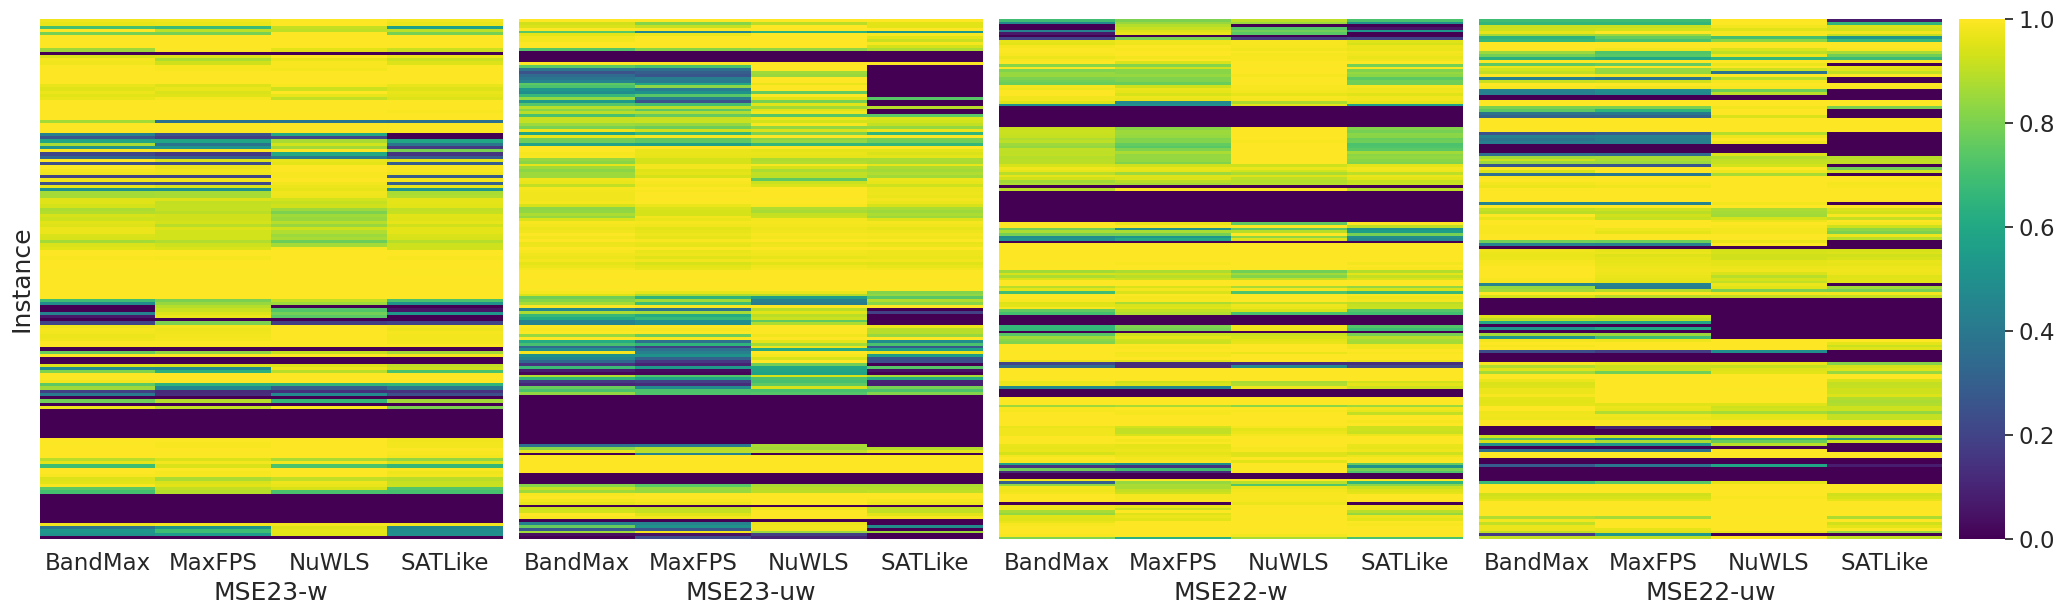

In [ ]:

fig, ax = plt.subplots(1, 5, figsize=(20.5,6),gridspec_kw={'width_ratios': [10,10,10,10,1]})
sns.set(font_scale = 1.5)

legend_flag = lambda index: True if index == 3  else False
score_info  = score_info.replace(["BandMaxSAT"],'BandMax')
score_info = score_info.replace("NuWLs", "NuWLS")
for i,ins_set in enumerate(['MSE23-w','MSE23-uw','MSE22-w','MSE22-uw']):

    sns.heatmap(score_info[score_info['ins_set'].str.contains(ins_set)].pivot_table(index ="ins", columns="alg_name", values="score",dropna=False),
                cmap="viridis",  # Choose a sequential colormap
                yticklabels = '',
                vmax=1,         # Ensure same 
                vmin=0,          # color scale
                ax=ax[i],        # Arrange in subplot
                cbar = legend_flag(i),
                cbar_ax=ax[4]
               )
    
ax[0].set_ylabel('Instance')
ax[0].set_xlabel('MSE23-w')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)
ax[1].set_xlabel('MSE23-uw')
ax[1].set_ylabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)
ax[2].set_xlabel('MSE22-w')
ax[2].set_ylabel('')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)
ax[3].set_xlabel('MSE22-uw')
ax[3].set_ylabel('')
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=0)

plt.tight_layout(pad=0.1)
# plt.savefig('score.png', dpi=120)

#### ECDFs

The heatmap of ecdfs for individual instances

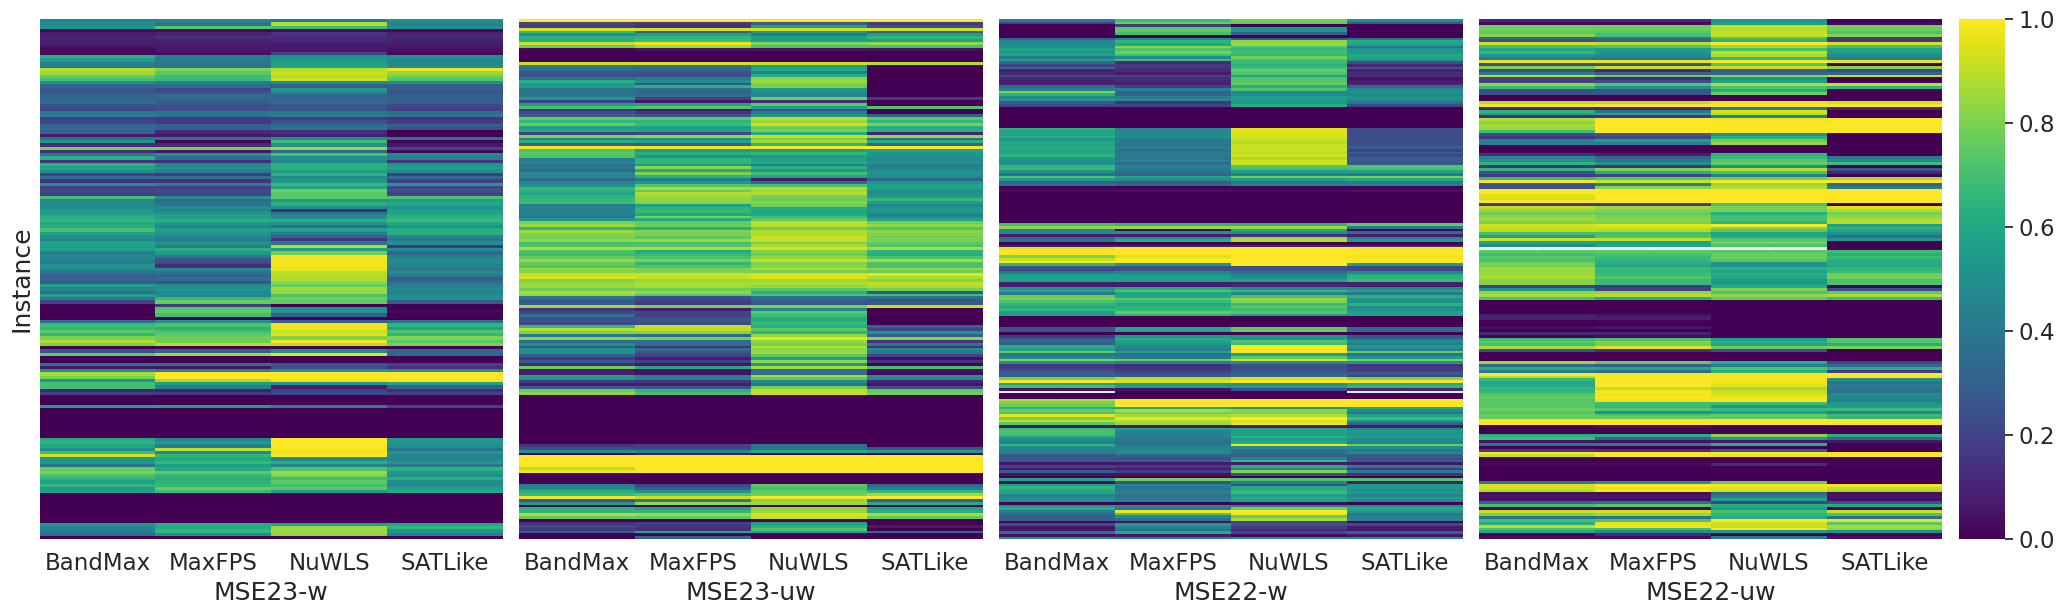

In [ ]:
result = pd.read_csv(os.path.join(working_path,'processed/ecdf_raw.csv'))
fig, ax = plt.subplots(1, 5, figsize=(20.5,6),gridspec_kw={'width_ratios': [10,10,10,10,1]})
sns.set(font_scale = 1.5)
result = result.replace(["BanditMax"],'BandMax')
result = result.replace("NuWLs", "NuWLS")
legend_flag = lambda index: True if index == 3  else False
for i,ins_set in enumerate(['MSE23-w','MSE23-uw','MSE22-w','MSE22-uw']):
   
    ecdf_info = result[(result['ins_set'].str.contains(ins_set)) & (result['alg_name'] != '')] # filtering runs in which obtain no feasible solutions
    
    per_ins_ecdf = ecdf_info.groupby(['alg_name','ins'])['ecdf'].mean()
    per_ins_ecdf = per_ins_ecdf.to_frame().reset_index()
    dt_plot = per_ins_ecdf.pivot_table(index="ins", columns="alg_name", values="ecdf")
    sns.heatmap(dt_plot,
                cmap="viridis",  # Choose a sequential colormap
                yticklabels = '',
                annot_kws={'fontsize':11},  # Reduce size of label to fit
                ax=ax[i],        # Arrange in subplot
                cbar = legend_flag(i),
                cbar_ax = ax[4]
               )

ax[0].set_ylabel('Instance')
ax[0].set_xlabel('MSE23-w')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)
ax[1].set_xlabel('MSE23-uw')
ax[1].set_ylabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)
ax[2].set_xlabel('MSE22-w')
ax[2].set_ylabel('')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)
ax[3].set_xlabel('MSE22-uw')
ax[3].set_ylabel('')
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=0)
plt.tight_layout(pad = 0.1)
# plt.savefig('ecdf.png', dpi=120)

Presenting the mean, the median, and the variance of the four solvers' ECDF values across multiple instances.

In [ ]:
result = pd.read_csv(os.path.join(working_path,'processed/ecdf_raw.csv'))
result = result.replace(["BanditMax"],'BandMax')
result = result.replace("NuWLs", "NuWLS")
per_ins_ecdf = result[result['alg_name'] != '']
per_ins_ecdf = per_ins_ecdf.pivot_table(index='ins',columns = 'alg_name',values='ecdf')

per_ins_ecdf = per_ins_ecdf.reset_index()
zero_ins = list(per_ins_ecdf[(per_ins_ecdf['BandMax'] == 0) & (per_ins_ecdf['MaxFPS'] == 0) & (per_ins_ecdf['NuWLS'] == 0) & (per_ins_ecdf['SATLike'] == 0)]['ins'])

dt_result = result[result['alg_name'] != '']
dt_result = dt_result[~dt_result['ins'].isin(zero_ins)]
dt_result = dt_result.groupby(['alg_name','ins_set'])['ecdf'].mean()
dt_result = dt_result.to_frame().reset_index()
print(dt_result.pivot_table(index='ins_set',columns = 'alg_name',values = 'ecdf').to_latex(float_format="{:.3f}".format))

dt_result = result[result['alg_name'] != '']
dt_result = dt_result[~dt_result['ins'].isin(zero_ins)]
dt_result = dt_result.groupby(['alg_name','ins_set'])['ecdf'].median()
dt_result = dt_result.to_frame().reset_index()
print(dt_result.pivot_table(index='ins_set',columns = 'alg_name',values = 'ecdf').to_latex(float_format="{:.3f}".format))

dt_result = result[result['alg_name'] != '']
dt_result = dt_result[~dt_result['ins'].isin(zero_ins)]
dt_result = dt_result.groupby(['alg_name','ins_set'])['ecdf'].var()
dt_result = dt_result.to_frame().reset_index()
print(dt_result.pivot_table(index='ins_set',columns = 'alg_name',values = 'ecdf').to_latex(float_format="{:.3f}".format))

\begin{tabular}{lrrrr}
\toprule
alg_name & BandMax & MaxFPS & NuWLS & SATLike \\
ins_set &  &  &  &  \\
\midrule
MSE22-uw & 0.589 & 0.602 & 0.696 & 0.494 \\
MSE22-w & 0.458 & 0.470 & 0.624 & 0.420 \\
MSE23-uw & 0.546 & 0.548 & 0.696 & 0.466 \\
MSE23-w & 0.444 & 0.445 & 0.584 & 0.409 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
alg_name & BandMax & MaxFPS & NuWLS & SATLike \\
ins_set &  &  &  &  \\
\midrule
MSE22-uw & 0.688 & 0.717 & 0.806 & 0.557 \\
MSE22-w & 0.500 & 0.463 & 0.737 & 0.409 \\
MSE23-uw & 0.596 & 0.631 & 0.804 & 0.519 \\
MSE23-w & 0.444 & 0.470 & 0.700 & 0.431 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
alg_name & BandMax & MaxFPS & NuWLS & SATLike \\
ins_set &  &  &  &  \\
\midrule
MSE22-uw & 0.127 & 0.139 & 0.107 & 0.159 \\
MSE22-w & 0.119 & 0.119 & 0.123 & 0.105 \\
MSE23-uw & 0.108 & 0.118 & 0.091 & 0.140 \\
MSE23-w & 0.108 & 0.104 & 0.129 & 0.093 \\
\bottomrule
\end{tabular}



ECDFs along the optimization process for weighted and unweighted MaxSAT instances

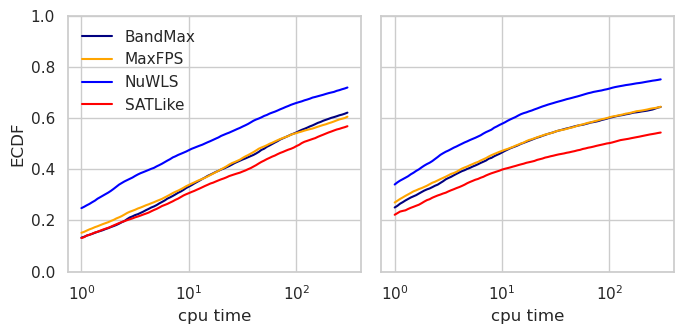

In [ ]:
result = pd.read_csv(os.path.join(working_path,'processed/ecdf_raw.csv'))
fig, ax = plt.subplots(1, 2, figsize=(7,3.5))
sns.set(font_scale = 1)
sns.set_style('whitegrid')
result = result.replace("BanditMax", "BandMax")
result = result.replace("NuWLs", "NuWLS")
ecdf_info = result[(result['alg_name'] != '') & ((result['ins_set'] == "MSE22-w") | (result['ins_set'] == "MSE23-w") )]
ecdf_info = ecdf_info.groupby(['alg_name','cpu_time'])['ecdf'].mean()
ecdf_info = ecdf_info.to_frame().reset_index()
ecdf_info.rename(columns = {'alg_name':'algorithm'}, inplace = True) 
ecdf_info.rename(columns = {'cpu_time':'cpu time'}, inplace = True) 
ecdf_info.rename(columns = {'ecdf':'ECDF'}, inplace = True) 

ecdffig= sns.lineplot(data = ecdf_info, x = 'cpu time',y = 'ECDF',hue='algorithm', ax = ax[0], palette =  ['navy','orange','blue','red'])
ecdf_info = result[(result['alg_name'] != '') & ((result['ins_set'] == "MSE22-uw") | (result['ins_set'] == "MSE23-uw") )]
ecdf_info = ecdf_info.groupby(['alg_name','cpu_time'])['ecdf'].mean()
ecdf_info = ecdf_info.to_frame().reset_index()
ecdf_info.rename(columns = {'alg_name':'algorithm'}, inplace = True) 
ecdf_info.rename(columns = {'cpu_time':'cpu time'}, inplace = True) 
ecdf_info.rename(columns = {'ecdf':'ECDF'}, inplace = True) 

ecdffig= sns.lineplot(data = ecdf_info, x = 'cpu time',y = 'ECDF',hue='algorithm', ax = ax[1], legend = False, palette = ['navy','orange','blue','red'])


ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[1].set_ylabel('')
ax[1].set_yticklabels('')
ax[0].legend(frameon=False,loc='upper left')
plt.tight_layout()
# ecdffig.get_figure().savefig(f"aggregated-ecdf.png")


ECDFs along the optimization process for specific instances

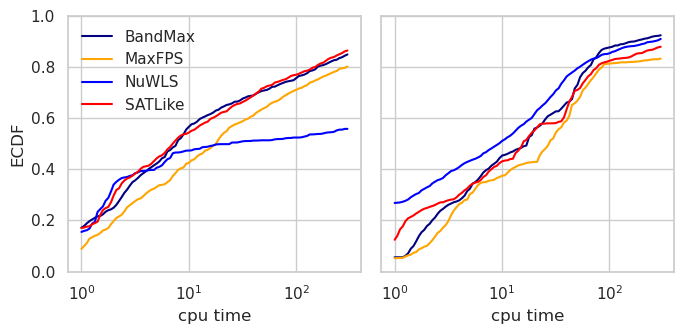

In [ ]:
result = pd.read_csv(os.path.join(working_path,'processed/ecdf_raw.csv'))
fig, ax = plt.subplots(1, 2, figsize=(7,3.5))
sns.set(font_scale = 1)
sns.set_style('whitegrid')
result = result.replace("BanditMax", "BandMax")
result = result.replace("NuWLs", "NuWLS")

ins_c = 'decision-tree'
ecdf_info = result[(result['alg_name'] != '') & (result['ins_set'] == "MSE23-w") & (result['ins'].str.contains(ins_c))]
ecdf_info = ecdf_info.groupby(['alg_name','cpu_time'])['ecdf'].mean()
ecdf_info = ecdf_info.to_frame().reset_index()
ecdf_info.rename(columns = {'alg_name':'algorithm'}, inplace = True) 
ecdf_info.rename(columns = {'cpu_time':'cpu time'}, inplace = True) 
ecdf_info.rename(columns = {'ecdf':'ECDF'}, inplace = True) 
ecdffig= sns.lineplot(data = ecdf_info, x = 'cpu time',y = 'ECDF',hue='algorithm', ax = ax[0], palette =['navy','orange','blue','red'])

ins_c = 'Parametric'
ecdf_info = result[(result['alg_name'] != '') & (result['ins_set'] == "MSE23-w") & (result['ins'].str.contains(ins_c))]
ecdf_info = ecdf_info.groupby(['alg_name','cpu_time'])['ecdf'].mean()
ecdf_info = ecdf_info.to_frame().reset_index()
ecdf_info.rename(columns = {'alg_name':'algorithm'}, inplace = True) 
ecdf_info.rename(columns = {'cpu_time':'cpu time'}, inplace = True) 
ecdf_info.rename(columns = {'ecdf':'ECDF'}, inplace = True) 
ecdffig= sns.lineplot(data = ecdf_info, x = 'cpu time',y = 'ECDF',hue='algorithm', ax = ax[1],legend=False, palette =['navy','orange','blue','red'])

ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[1].set_ylabel('')
ax[1].set_yticklabels('')

ax[0].legend(frameon=False,loc='upper left')

plt.tight_layout()
# ecdffig.get_figure().savefig(f"aggregated-ecdf-ins.png")


### Results of configurations obtained by SMAC

#### The scenario of tuning NuWLS

__Change the scenario__ {'NuWLs', 'BandMaxSAT', 'SATLike'} to achieve the corresponding results.

By default, we present the results of tuning BandMax, which is excluded from our manuscript.

In [ ]:
scenario = "BandMaxSAT"

##### The number of winning instances

comparing the best of ten runs

In [ ]:

ins_sets = ['MSE23-w','MSE23-uw']
best_f_info = pd.read_csv(os.path.join(working_path,f'processed/raw_info_tuned_{scenario}.csv'))

win_ins = pd.DataFrame(columns=["ins_set","best-f-1","ecdf-1","best-f-2","ecdf-2","best-f-3","ecdf-3","best-f-5","ecdf-5","best-f-4","ecdf-4"])
for ins_set in ins_sets:
    tmp_best_f_info = best_f_info[best_f_info['ins_set'] == ins_set]
    compare_min = tmp_best_f_info.pivot_table(index ="ins", columns="alg_name", values="min",dropna=False)
    compare_min['min'] = compare_min.min(axis=1)
    win_ins.loc[len(win_ins.index)] = [ins_set,\
                                    len(compare_min[compare_min['best-f-1'] == compare_min['min']]),\
                                    len(compare_min[compare_min['best-f-2'] == compare_min['min']]),\
                                    len(compare_min[compare_min['best-f-3'] == compare_min['min']]),\
                                    len(compare_min[compare_min['best-f-4'] == compare_min['min']]),\
                                    len(compare_min[compare_min['best-f-5'] == compare_min['min']]),\
                                    len(compare_min[compare_min['ecdf-1'] == compare_min['min']]),\
                                    len(compare_min[compare_min['ecdf-2'] == compare_min['min']]),\
                                    len(compare_min[compare_min['ecdf-3'] == compare_min['min']]),\
                                    len(compare_min[compare_min['ecdf-4'] == compare_min['min']]),\
                                    len(compare_min[compare_min['ecdf-5'] == compare_min['min']]),\
                                       ]
    # compare_min.reset_index()[['ins','min']].to_csv(f'best-found-{scenario}-{ins_set}.csv',index=False)
win_ins

,ins_set,best-f-1,ecdf-1,best-f-2,ecdf-2,best-f-3,ecdf-3,best-f-5,ecdf-5,best-f-4,ecdf-4
0,MSE23-w,122,125,111,121,124,124,126,109,123,117
1,MSE23-uw,145,150,140,144,145,143,149,138,141,142


comparing the mean of ten runs

In [ ]:

win_ins = pd.DataFrame(columns=["ins_set","best-f-1","ecdf-1","best-f-2","ecdf-2","best-f-3","ecdf-3","best-f-5","ecdf-5","best-f-4","ecdf-4"])
for ins_set in ins_sets:
    tmp_best_f_info = best_f_info[best_f_info['ins_set'] == ins_set]
    compare_mean = tmp_best_f_info.pivot_table(index ="ins", columns="alg_name", values="mean",dropna=False)
    compare_mean['min'] = compare_mean.min(axis=1)
    win_ins.loc[len(win_ins.index)] = [ins_set,\
                                    len(compare_mean[compare_mean['best-f-1'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['best-f-2'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['best-f-3'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['best-f-4'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['best-f-5'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['ecdf-1'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['ecdf-2'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['ecdf-3'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['ecdf-4'] == compare_mean['min']]),\
                                    len(compare_mean[compare_mean['ecdf-5'] == compare_mean['min']]),\
                                       ]
win_ins

,ins_set,best-f-1,ecdf-1,best-f-2,ecdf-2,best-f-3,ecdf-3,best-f-5,ecdf-5,best-f-4,ecdf-4
0,MSE23-w,76,92,57,80,74,72,88,55,74,68
1,MSE23-uw,112,135,94,111,115,107,130,95,106,104


#### Scores
Presenting the mean, the median, and the variance of the NuWLS configurations obtained by SMAC

In [ ]:
score_info = pd.read_csv(os.path.join(working_path,f'processed/score_info_{scenario}.csv'))

dt_score_info = score_info.pivot_table(index='ins',columns = 'alg_name',values='score')
dt_score_info = dt_score_info.reset_index()
zero_ins = list(dt_score_info[(dt_score_info['best-f-1'] == 0) & \
                              (dt_score_info['best-f-2'] == 0) & \
                                (dt_score_info['best-f-3'] == 0) & \
                                (dt_score_info['best-f-4'] == 0) & \
                                (dt_score_info['best-f-5'] == 0) & \
                              (dt_score_info['ecdf-1'] == 0) \
                                & (dt_score_info['ecdf-2'] == 0) \
                                  & (dt_score_info['ecdf-3'] == 0)\
                                   & (dt_score_info['ecdf-4'] == 0) \
                                  & (dt_score_info['ecdf-5'] == 0)\
                                    ]['ins'])

dt_score_info = score_info[~score_info['ins'].isin(zero_ins)]
dt_score_info = dt_score_info.groupby(['alg_name','ins_set'])['score'].mean()
dt_score_info = dt_score_info.to_frame().reset_index()
print(dt_score_info.pivot_table(index ='alg_name',columns = 'ins_set',values='score').to_latex())

dt_score_info = score_info[~score_info['ins'].isin(zero_ins)]
dt_score_info = dt_score_info.groupby(['alg_name','ins_set'])['score'].median()
dt_score_info = dt_score_info.to_frame().reset_index()
print(dt_score_info.pivot_table(index ='alg_name',columns = 'ins_set',values='score').to_latex())


dt_score_info = score_info[~score_info['ins'].isin(zero_ins)]
dt_score_info = dt_score_info.groupby(['alg_name','ins_set'])['score'].var()
dt_score_info = dt_score_info.to_frame().reset_index()
print(dt_score_info.pivot_table(index ='alg_name',columns = 'ins_set',values='score').to_latex())

\begin{tabular}{lrr}
\toprule
ins_set & MSE23-uw & MSE23-w \\
alg_name &  &  \\
\midrule
best-f-1 & 0.886322 & 0.936156 \\
best-f-2 & 0.888886 & 0.937208 \\
best-f-3 & 0.880882 & 0.931258 \\
best-f-4 & 0.884775 & 0.936874 \\
best-f-5 & 0.884068 & 0.936654 \\
ecdf-1 & 0.884038 & 0.937476 \\
ecdf-2 & 0.888228 & 0.938088 \\
ecdf-3 & 0.879964 & 0.933921 \\
ecdf-4 & 0.885557 & 0.936452 \\
ecdf-5 & 0.884087 & 0.936650 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
ins_set & MSE23-uw & MSE23-w \\
alg_name &  &  \\
\midrule
best-f-1 & 0.955720 & 0.988533 \\
best-f-2 & 0.955720 & 0.990401 \\
best-f-3 & 0.955529 & 0.986470 \\
best-f-4 & 0.955720 & 0.989335 \\
best-f-5 & 0.955720 & 0.987759 \\
ecdf-1 & 0.955720 & 0.988585 \\
ecdf-2 & 0.955720 & 0.990901 \\
ecdf-3 & 0.955529 & 0.987728 \\
ecdf-4 & 0.955720 & 0.988831 \\
ecdf-5 & 0.955529 & 0.987759 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
ins_set & MSE23-uw & MSE23-w \\
alg_name &  &  \\
\midrule
best-f-1 & 0.027353

#### ECDFs
Presenting the mean, the median, and the variance of the four solvers' ECDF values across multiple instances.

In [ ]:
result = pd.read_csv(os.path.join(working_path,f'processed/ecdf_raw_{scenario}.csv'))
per_ins_ecdf = result[result['alg_name'] != '']
per_ins_ecdf = per_ins_ecdf.pivot_table(index='ins',columns = 'alg_name',values='ecdf')

per_ins_ecdf = per_ins_ecdf.reset_index()
zero_ins = list(per_ins_ecdf[(per_ins_ecdf['best-f-1'] == 0) & \
                             (per_ins_ecdf['best-f-2'] == 0) & \
                              (per_ins_ecdf['best-f-3'] == 0) & \
                              (per_ins_ecdf['best-f-4'] == 0) & \
                              (per_ins_ecdf['best-f-5'] == 0) & \
                            (per_ins_ecdf['ecdf-1'] == 0) \
                                & (per_ins_ecdf['ecdf-2'] == 0) \
                                & (per_ins_ecdf['ecdf-3'] == 0) \
                                 & (per_ins_ecdf['ecdf-4'] == 0) \
                                & (per_ins_ecdf['ecdf-5'] == 0)
                                ])

dt_result = result[result['alg_name'] != '']
dt_result = dt_result[~dt_result['ins'].isin(zero_ins)]
dt_result = dt_result.groupby(['alg_name','ins_set'])['ecdf'].mean()
dt_result = dt_result.to_frame().reset_index()
print(dt_result.pivot_table(index='alg_name',columns = 'ins_set',values = 'ecdf').to_latex())

dt_result = result[result['alg_name'] != '']
dt_result = dt_result[~dt_result['ins'].isin(zero_ins)]
dt_result = dt_result.groupby(['alg_name','ins_set'])['ecdf'].median()
dt_result = dt_result.to_frame().reset_index()
print(dt_result.pivot_table(index='alg_name',columns = 'ins_set',values = 'ecdf').to_latex())

dt_result = result[result['alg_name'] != '']
dt_result = dt_result[~dt_result['ins'].isin(zero_ins)]
dt_result = dt_result.groupby(['alg_name','ins_set'])['ecdf'].var()
dt_result = dt_result.to_frame().reset_index()
print(dt_result.pivot_table(index='alg_name',columns = 'ins_set',values = 'ecdf').to_latex())

\begin{tabular}{lrr}
\toprule
ins_set & MSE23-uw & MSE23-w \\
alg_name &  &  \\
\midrule
best-f-1 & 0.528724 & 0.415356 \\
best-f-2 & 0.535705 & 0.419808 \\
best-f-3 & 0.514251 & 0.401626 \\
best-f-4 & 0.526378 & 0.413903 \\
best-f-5 & 0.529433 & 0.413695 \\
ecdf-1 & 0.528194 & 0.414918 \\
ecdf-2 & 0.534813 & 0.419581 \\
ecdf-3 & 0.511143 & 0.401134 \\
ecdf-4 & 0.525191 & 0.413311 \\
ecdf-5 & 0.526463 & 0.411902 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
ins_set & MSE23-uw & MSE23-w \\
alg_name &  &  \\
\midrule
best-f-1 & 0.616667 & 0.447917 \\
best-f-2 & 0.625245 & 0.450980 \\
best-f-3 & 0.590909 & 0.425000 \\
best-f-4 & 0.614286 & 0.446316 \\
best-f-5 & 0.616667 & 0.444444 \\
ecdf-1 & 0.616667 & 0.445994 \\
ecdf-2 & 0.625000 & 0.456250 \\
ecdf-3 & 0.582393 & 0.425000 \\
ecdf-4 & 0.614286 & 0.441187 \\
ecdf-5 & 0.614286 & 0.440000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
ins_set & MSE23-uw & MSE23-w \\
alg_name &  &  \\
\midrule
best-f-1 & 0.126162

ECDFs along the optimization process for 2023 weighted and unweighted MaxSAT instances

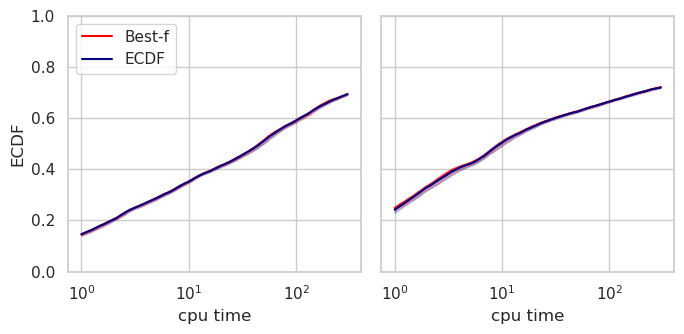

In [ ]:
result = pd.read_csv(os.path.join(working_path,f'processed/ecdf_raw_{scenario}.csv'))
fig, ax = plt.subplots(1, 2, figsize=(7,3.5))
sns.set(font_scale = 1)


ecdf_info1 = result[(result['alg_name'] != '')& (result['alg_name'] != np.nan) &(result['ins_set'] == 'MSE23-w') ]
ecdf_info1['cost function'] = ['ECDF' if ('ecdf' in str(x)) else 'Best-f' for x in ecdf_info1['alg_name']]
ecdf_info1 = ecdf_info1.groupby(['cpu_time','alg_name','cost function'])['ecdf'].mean()
ecdf_info1 = ecdf_info1.to_frame().reset_index()
ecdf_info1.rename(columns = {'alg_name':'algorithm'}, inplace = True) 
ecdf_info1.rename(columns = {'cpu_time':'cpu time'}, inplace = True) 
ecdf_info1.rename(columns = {'ecdf':'ECDF'}, inplace = True) 

sns.lineplot(data = ecdf_info1, x = 'cpu time',y = 'ECDF', ax = ax[0], hue = 'cost function', palette=['red','navy'])

ecdf_info1 = result[(result['alg_name'] != '') & (result['alg_name'] != np.nan) & (result['ins_set'] == 'MSE23-uw') ]
ecdf_info1['cost function'] = ['ECDF' if ('ecdf' in str(x)) else 'Best-f' for x in ecdf_info1['alg_name']]
ecdf_info1 = ecdf_info1.groupby(['cpu_time','alg_name','cost function'])['ecdf'].mean()
ecdf_info1 = ecdf_info1.to_frame().reset_index()
ecdf_info1.rename(columns = {'alg_name':'algorithm'}, inplace = True) 
ecdf_info1.rename(columns = {'cpu_time':'cpu time'}, inplace = True) 
ecdf_info1.rename(columns = {'ecdf':'ECDF'}, inplace = True) 

sns.lineplot(data = ecdf_info1, x = 'cpu time',y = 'ECDF',ax = ax[1], hue = 'cost function',legend=False, palette=['red','navy'])
sns.set(font_scale =1,style='whitegrid')



ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].legend(title = '')

ax[1].set_ylabel('')
ax[1].set_yticklabels('')
sns.set(font_scale =1,style='whitegrid')
sns.move_legend(ax[0], "upper left")
plt.tight_layout()
# plt.savefig('tuned-satlike.png', dpi=120)

## Processing raw data

Following are the codes that generate csv files used in the upper boxes.

### common functions

##### Read raw files

In [ ]:
def get_alg_names(path):
    folders = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]
    return folders

def get_ins_names(path):
    folders = [name[:-4] for name in os.listdir(path) if ".log" in name]
    return folders

def get_run_info(file):
    ins_name = os.path.splitext(os.path.basename(file))[0]
    dt = pd.DataFrame(columns=['run_id','ins','f','cpu_time'])
    f = open(file)
    lines = f.readlines()
    if len(lines) == 0:
        return dt
    r_id = 0
    pre_cpu_time = 0
    found_solution = True
    first_entry = True
    for line in lines:
        line = line.strip()
        c = line.count(ins_name)
        if c > 0:
            if not found_solution:
                dt.loc[len(dt.index)] = [r_id,ins_name, None, None]
            r_id += 1
            found_solution = False
            first_entry = True
        else:
            info = line.split(' ')
            if len(info) == 1:
                ## for BanditMax and MaxFPS
                continue
            else:
                if (float(info[2]) == pre_cpu_time) & (not first_entry):
                    dt.iloc[len(dt.index)-1,2] = int(info[1])
                    first_entry = False
                else:   
                    dt.loc[len(dt.index)] = [r_id,ins_name, int(info[1]), float(info[2])]
                pre_cpu_time = float(info[2])
            found_solution = True
    if not found_solution:
        dt.loc[len(dt.index)] = [r_id,ins_name, None, None]
    return dt

##### Generate raw info

In [ ]:

def best_mean(dt,cpu_time = 600):
    ### Pandas : ['run_id','ins','f','cpu_time']
    dt = dt[dt['f'].notna()]
    dt = dt[dt['cpu_time'] <= cpu_time]
    if len(dt) == 0:
        return None
    return np.mean(list(dt.groupby('run_id')['f'].min()))

def best_median(dt,cpu_time = 600):
    ### Pandas : ['run_id','ins','f','cpu_time']
    dt = dt[dt['f'].notna()]
    dt = dt[dt['cpu_time'] <= cpu_time]
    if len(dt) == 0:
        return None
    return np.median(list(dt.groupby('run_id')['f'].min()))

def best_min(dt,cpu_time = 600):
    ### Pandas : ['run_id','ins','f','cpu_time']
    dt = dt[dt['f'].notna()]
    dt = dt[dt['cpu_time'] <= cpu_time]
    if len(dt) == 0:
        return None
    return np.min(list(dt.groupby('run_id')['f'].min()))


def number_of_runs(dt):
    return len(dt.run_id.unique())

def feasible_rate(dt,cpu_time = 600):
    ### Pandas : ['run_id','ins','f','cpu_time']
    runs = dt.run_id.unique()
    sr = 0
    for r in runs:
        if dt[dt['run_id'] == r]['f'].iloc[0] == None:
            continue
        else:
            if len(dt[(dt['run_id'] == r) & (dt['cpu_time'] <= cpu_time)]) == 0:
                continue
            else:
                sr += 1
    return sr / len(runs)

##### Generate scores

In [ ]:
def score(dt,best_f,cpu_time = 300):
    num_r = len(dt.run_id.unique())
    dt = dt[dt['f'].notna()]
    dt = dt[dt['cpu_time'] <= cpu_time]
    runs_f = list(dt.groupby('run_id')['f'].min())
    score = 0
    for f in runs_f:
        score += ((best_f+1) / (f+1))
    return score / num_r

##### Generate ECDFs

In [ ]:
def get_ins_data(path, ins_set,ins,algs):
    run_info = pd.DataFrame(columns=['run_id','ins','f','cpu_time'])
    for alg in algs:
        dt = get_run_info(os.path.join(path,alg,ins_set,ins+'.log'))
        dt['alg_name'] = alg
        run_info = pd.concat([run_info,dt]).reset_index(drop=True)
    return run_info

def fixed_RT_Data_subset(path,ins_set,ins,algs):
     ### Pandas : ['alg_name', 'run_id','ins','f','cpu_time']
    
    dt = get_ins_data(path,ins_set,ins,algs)
    evals = np.logspace(0,np.log(300),100,base=np.e)


    dt.sort_values(by=['alg_name','run_id','cpu_time'],inplace = True)

    max_length = len(dt.index)    
    current_run_id = "nonrun"
    current_alg = ""
    current_f = float("inf")
    eval_index = 0

    result = pd.DataFrame(columns = dt.columns)
    for i in range(max_length):
        if (dt["alg_name"].iloc[i] != current_alg) | (dt["run_id"].iloc[i] != current_run_id):
            if current_run_id != "nonrun":
                while eval_index < len(evals):
                    result.loc[len(result.index)] = [dt["run_id"].iloc[i-1], ins, current_f, evals[eval_index], dt["alg_name"].iloc[i-1]]
                    eval_index += 1

            # dealing nan info
            if dt["f"].iloc[i] == None:
                dt.iloc[i,2] = float("inf")
                dt.iloc[i,3] = evals[0]
                for e in range(0,len(evals)):
                    result.loc[len(result.index)] = [dt["run_id"].iloc[i], ins, float("inf"), evals[e], dt["alg_name"].iloc[i]]
                current_alg = dt['alg_name'].iloc[i]
                current_run_id = dt["run_id"].iloc[i]

                eval_index = len(evals)
                continue
                    
            eval_index = 0
            current_f = float("inf")
            current_alg = dt['alg_name'].iloc[i]
            current_run_id = dt["run_id"].iloc[i]
            
            while dt["cpu_time"].iloc[i] > evals[eval_index]:
                result.loc[len(result.index)] = [current_run_id, ins, current_f, evals[eval_index], current_alg]
                eval_index += 1
                if eval_index >= len(evals):
                    break
            current_f = dt['f'].iloc[i]
        
        if eval_index < len(evals):
            while (dt["cpu_time"].iloc[i] >= evals[eval_index]):
                result.loc[len(result.index)] = [current_run_id, ins, current_f, evals[eval_index], current_alg]
                eval_index += 1
                if eval_index >= len(evals):
                    break
                
        current_f = dt['f'].iloc[i]
    
    while eval_index < len(evals):
        result.loc[len(result.index)] = [current_run_id, ins, current_f, evals[eval_index], current_alg]
        eval_index += 1
    result.sort_values(by=['alg_name','run_id','cpu_time'],inplace = True)
    return result

def ecdf_one_ins(dt,ins_set):
    # Pandas [['run_id','ins','f','cpu_time','alg_name']
    evals = list(dt.cpu_time.unique())
    evals.sort()

    fitness = list(dt.f.unique())
    while float("inf") in fitness:
        fitness.remove(float("inf"))

    if len(fitness) == 0:
        fitness = [-1]
    else:
        fitness.sort()

    algs = list(dt.alg_name.unique())
    ins = dt["ins"][0]
    result = pd.DataFrame(columns = ['alg_name','ins','ins_set','cpu_time','ecdf'])

    for alg in algs:
        tmp_dt = dt[dt["alg_name"]==alg]
        for e in evals:
            runs = list(tmp_dt.run_id.unique())
            s_num = 0
            for r in runs:
                found_f = tmp_dt[(tmp_dt["cpu_time"] == e) & (tmp_dt["run_id"] == r)]["f"].iloc[0]
                s_num += len([f for f in fitness if f >= found_f])
            ecdf_value = s_num / (len(fitness) * len(runs))
            result.loc[len(result)] = [alg,ins,ins_set,e,ecdf_value]
    return result



### The entry to generate csv files

__Change the path__ to achieve results for the corresponding scenarios.

For the results of the four state-of-the-art solvers, set scenario_path as ``raw/four_algorithms/``

For the three SMAC scenarios of {NuWLs, BandMaxSAT, SATLike}, set scenario_path as ``raw/tuned/{scenario}``

In [ ]:
scenario_path = 'raw/four_algorithms/'
# scenario_path = 'raw/tuned/BandMaxSAT'
# scenario_path = 'raw/tuned/NuWLs'
# scenario_path = 'raw/tuned/SATLike'

Generating raw info of each solver, containing cpu time and values of corresponding best-found solution.

In [ ]:
path = os.path.join(working_path,scenario_path)
algs = get_alg_names(path)
ins_set = ['MSE23-w','MSE23-uw','MSE22-w','MSE22-uw']

best_f_info = pd.DataFrame(columns=['alg_name','ins', 'ins_set', 'mean', 'median', 'min',"fr","nr"])
cap_time = 300
for ins_s in ins_set:
    for alg in algs:
        if not os.path.exists(os.path.join(path,alg,ins_s)):
            continue
        inss = get_ins_names(os.path.join(path,alg,ins_s))

        for ins in inss:
            dt = get_run_info(os.path.join(path,alg,ins_s,ins+'.log'))
            if len(dt) == 0:
                best_f_info.loc[len(best_f_info.index)] = [alg,ins,ins_s,None,None,None,None,0]
                continue 
            best_f_info.loc[len(best_f_info.index)] = [alg,ins,ins_s,best_mean(dt,cap_time),best_median(dt,cap_time),best_min(dt,cap_time),feasible_rate(dt,cap_time),number_of_runs(dt)]
# best_f_info.to_csv('raw_info_four_algorithms.csv',index=False)
# best_f_info.to_csv(f'raw_info_tuned_{scenario}.csv',index=False)

In [ ]:
path = os.path.join(working_path,scenario_path)
algs = get_alg_names(path)
ins_set = ['MSE23-w','MSE23-uw','MSE22-w','MSE22-uw']

score_info = pd.DataFrame(columns=['alg_name','ins', 'ins_set', 'score'])
# Pandas ['alg_name','ins', 'mean', 'median', 'min']
cap_time = 300
for ins_s in ins_set:
    if "tuned" not in path:
        best_found_csv = f'best-found-{ins_s}.csv'
    else:
        a = str(path).split('/')
        a = a[len(a)-1]
        best_found_csv = f'best-found-{a}-{ins_s}.csv'
    best_found = pd.read_csv(best_found_csv) 
    for alg in algs:
        if not os.path.exists(os.path.join(path,alg,ins_s)):
            continue
        inss = get_ins_names(os.path.join(path,alg,ins_s))

        for ins in inss:
            best_found_fitness = best_found[best_found['ins'] == ins]['min'].values[0]
            dt = get_run_info(os.path.join(path,alg,ins_s,ins+'.log'))
            if len(dt) == 0:
                score_info.loc[len(score_info.index)] = [alg,ins,ins_s,0]
                continue 
            score_info.loc[len(score_info.index)] = [alg,ins,ins_s,score(dt,best_found_fitness,cap_time)]
# score_info.to_csv('score_info_four_algorithms.csv',index=False)
# score_info.to_csv(f'score_info_{scenario}.csv',index=False)

In [ ]:
path = os.path.join(working_path,scenario_path)
algs = get_alg_names(path)
ins_sets = ['MSE23-w','MSE23-uw','MSE22-w','MSE22-uw']
result = pd.DataFrame([])

for ins_set in ins_sets:
    
    if 'tuned' in path:
        inss = get_ins_names(os.path.join(path,'best-f-1',ins_set))
    else:
        inss = get_ins_names(os.path.join(path,'BanditMax',ins_set))
    for ins in inss:
        # print(ins)
        dt = fixed_RT_Data_subset(path,ins_set,ins,algs)
        result = pd.concat([result,ecdf_one_ins(dt,ins_set)])

# result.to_csv('ecdf_raw.csv',index=False)
# result.to_csv(f'ecdf_raw_{scenario}.csv',index=False)